In [47]:
# import relavant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Applied Section

## q8

In [48]:
auto = pd.read_csv('data/auto.csv')

In [49]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [50]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [51]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.6+ KB


In [52]:
X = auto.horsepower.values.reshape(-1,1)
y = auto.mpg.values.reshape(-1,1)

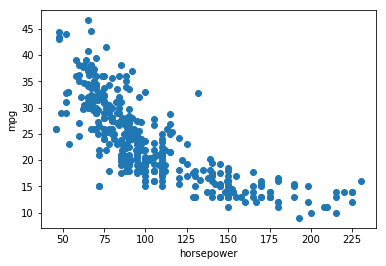

In [53]:
plt.scatter(X,y)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

In [54]:
import statsmodels.formula.api as smf

In [55]:
results = smf.ols('mpg ~ horsepower', data=auto).fit()

In [56]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           7.03e-81
Time:                        00:33:01   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    1. Is there a relationship between the predictor and the response? 
we can find this by checking the coefficient value given by the least squares model which is 0.1578. This value represents the change in the response variable for a unit increase in the predictor variable: In this context,it is 0.1588 increase in mpg for a unit increase in horsepower. The 95% confidence interval for the coefficient is [-0.171,-0.145]. The p value is less than 0.5. Hence we can reject the null hypothesis(the parameter coefficient is zero) in favour of the alterate hypothesis- that is, we declare that there is some relationship to exist between horsepower and mpg. 

    2. How strong is the relationship between the predictor and the response?
To assess how strong the relationship is, we need to quantify the extent to which the model fits the data. The quality of a linear regression fit is typically assessed using two measures: R2 statistic and the MSE(mean squared error). R2 statistic is the propotion of variance explained. R2 is calculated by TSS(total sum of squares)-RSS(Residual sum of squares)/TSS(total sum of squares). TSS measures the total variance in the response Y. R2 for this model is 0.606. R2 of a 0.606 means that 61% of the of the variablity in mpg is explained by a linear regression on horsepower.

    3. Is the relationship between the predictor and the response positive or negative? 
We can assess this by referring to the value of the coefficince. since the value is negative, the relationship is negative.


    4. what is the predicted mpg associated with a horsepower of 98? what are the the associated 95% confidence and prediction intervals?
predicted value is 24.46.

In [57]:
print(dir(results))

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_robustcov_results', '_is_nested', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params'

In [58]:
results.params

Intercept     39.935861
horsepower    -0.157845
dtype: float64

In [59]:
results.params.Intercept

39.935861021170474

In [60]:
results.params.horsepower

-0.15784473335365357

In [61]:
results.params.Intercept + results.params.horsepower * 98

24.467077152512424

## q9

In [62]:
autoau = pd.read_csv('data/auto.csv')

In [63]:
import seaborn as sns

 #### a. scatter plot matrix

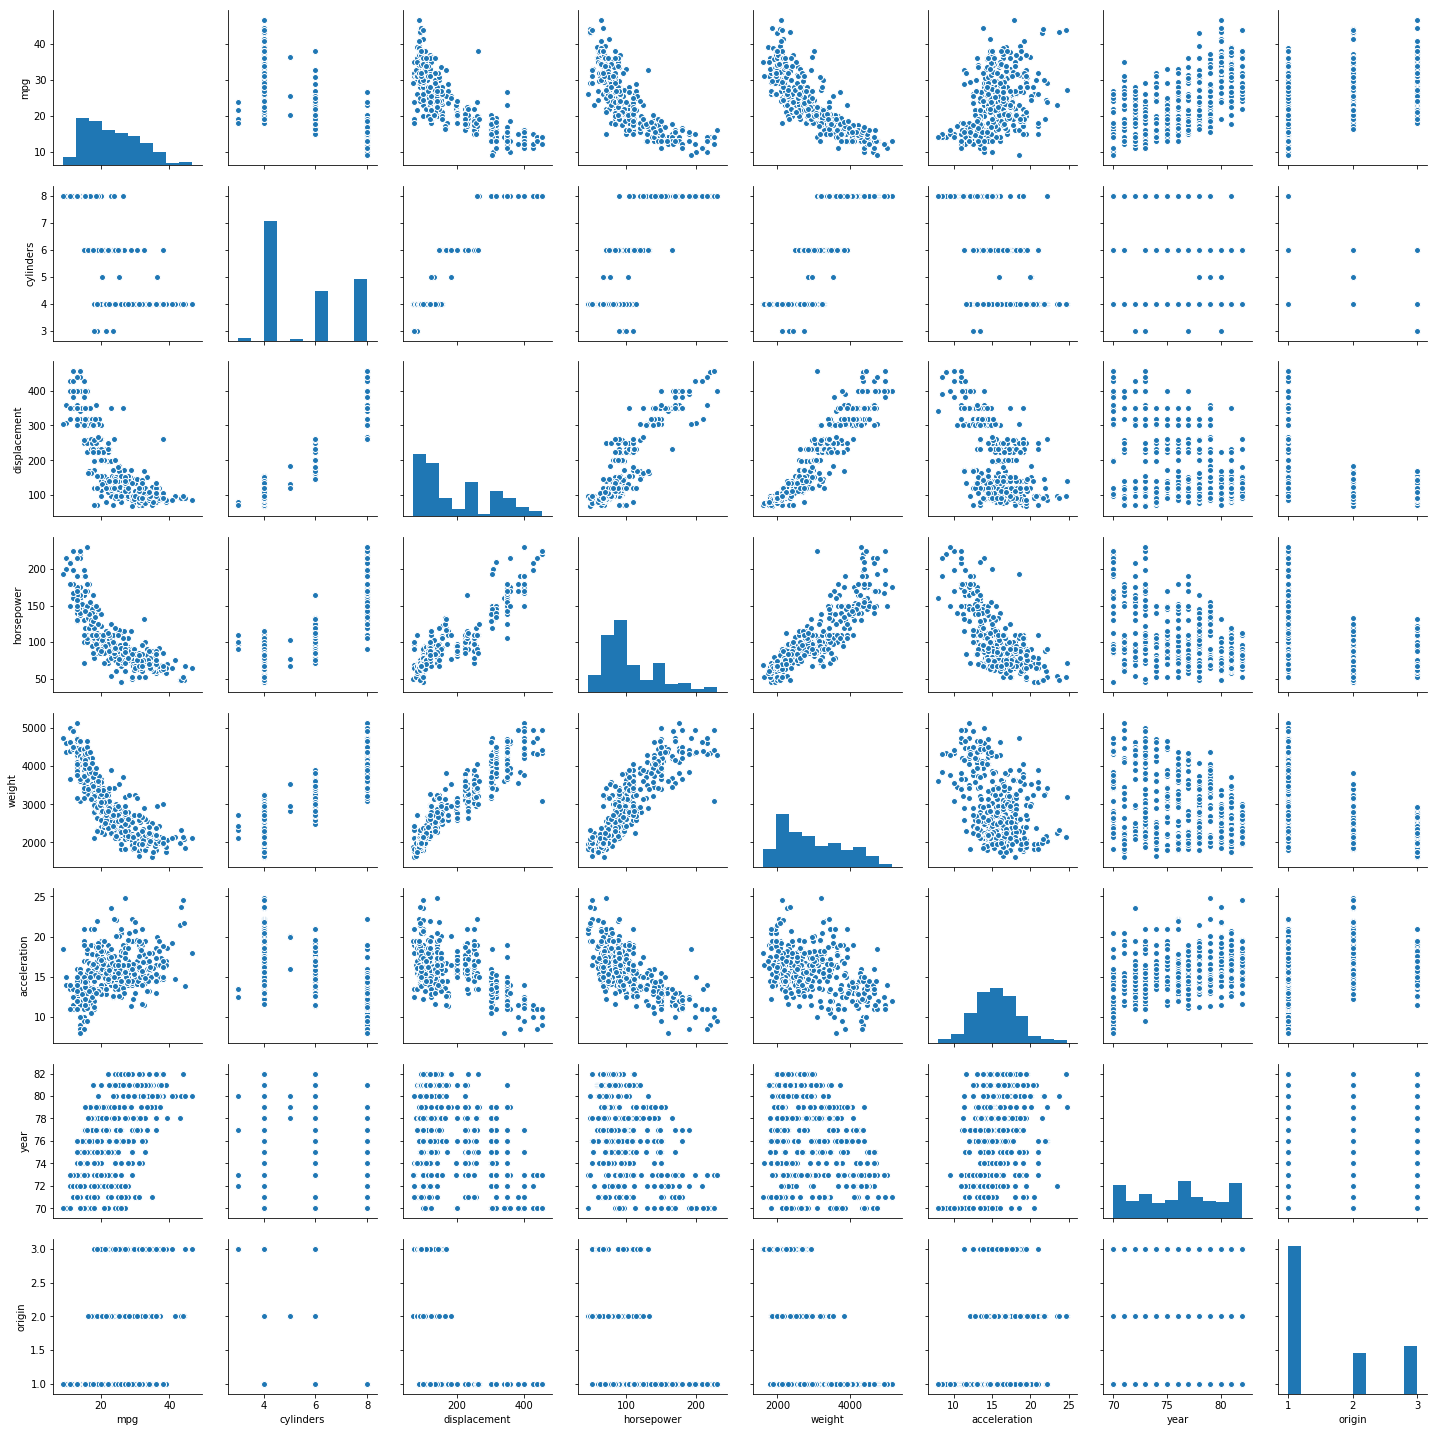

In [64]:
# producing a scatterplot matrix which includes all the variables
sns.pairplot(auto)
plt.show()

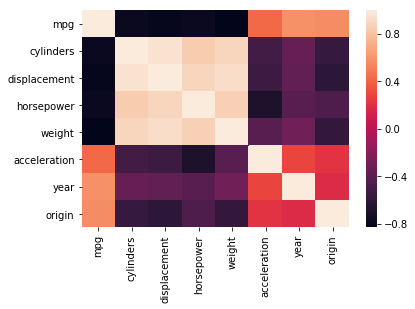

In [65]:
# compute the matrix of correlations between the variables
corr = auto.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

 #### b. matrix of correlations

In [66]:
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [67]:
# multiple regression
import statsmodels.formula.api as smf

In [68]:
results = smf.ols('mpg ~ ' + " + ".join(auto.columns[1:-1]),data=auto).fit()

 #### c. model summary

In [69]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 21 Mar 2018   Prob (F-statistic):          2.04e-139
Time:                        00:33:08   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
'mpg ~ ' + " + ".join(auto.columns[1:-1])

'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'

    1. Is there a relationship between the predictor and the response? 
in simple linear regression setting, in order to to check if a relationship exists we can simply check B1 = 0. but in mulitple regression, we have multiple predictors and we need to ask whether all the regression coefficients are zero. i.o B1=B2=B3=Bp=0. The alternative hypothesis would be at least one Bj is non zero. we test the hypothesis by computing the F-statistic. As per the summary table, the F-statisic is 252.4 which is far greater than 1, hence it provides compelling evidence against the null hypothesis. The p value associated with F-statistic is less than 0.5. Hence, we can reject the null hypothesis in favour of alternate and conclude that there is a relationship between the predictor and the response.

    2. Which predictors appear to have a statistically significant relationship to the response?
displacement,weight,year, and origin predictors are statistically signficant

    3. what does the coefficient for the year variable suggest?
It is positive, the higher the year the more the mpg

 #### d. Diagnostic plots
    
we can draw the distribution of residuals. Residuals can show how poorly a model represents data.Using this information, not only could you check if linear regression assumptions are met, but you could improve your model in an exploratory way.

The leverage plot identifies one unusual point.most residuals fall within 3 std deviations. The qq plot looks pretty good until the right tail where where a few observations are above 3 std deviatios indicating outliers.

#### Residual plot(to check if data has non linear patterns)
which draws a scatter plot of fitted values(x) against residuals(y)

In [105]:
# fitted values (need a constant term for intercept)
model_fitted_y = results.fittedvalues

# model residuals
model_residuals = results.resid

# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# leverage, from statsmodels internals
model_leverage = results.get_influence().hat_matrix_diag

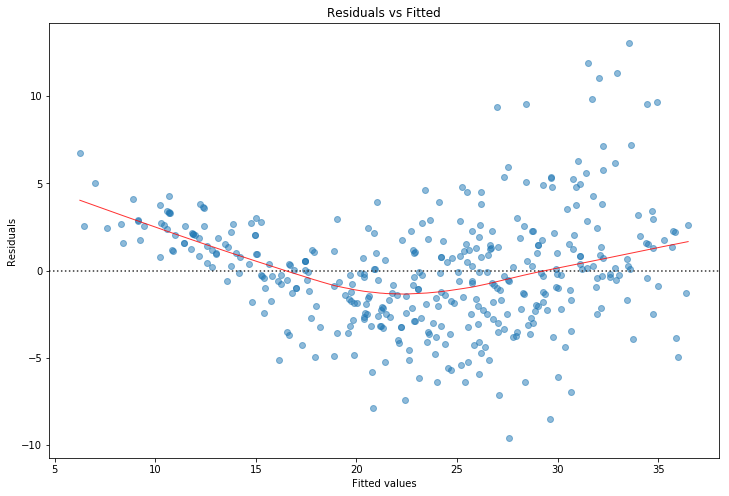

In [98]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

sns.residplot(model_fitted_y, 'mpg', data=auto,
              lowess=True,
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

plt.show()

#### QQ plot(This one shows how well the distribution of residuals fit the normal distribution.)
This plots the standardized (z-score) residuals against the theoretical normal quantiles.

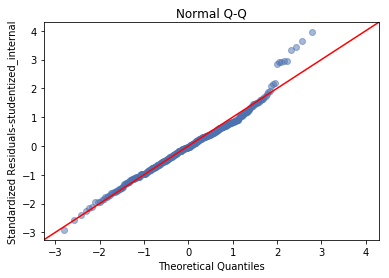

In [110]:
from statsmodels.graphics.gofplots import ProbPlot


QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals-studentized_internal')

plt.show()

#### Scale-Location(Non-constant Variance of Error Terms)

This is how you can check the assumption of equal variance (heteroscedasticity). It’s good if we see a horizontal line with equally (randomly) spread points.

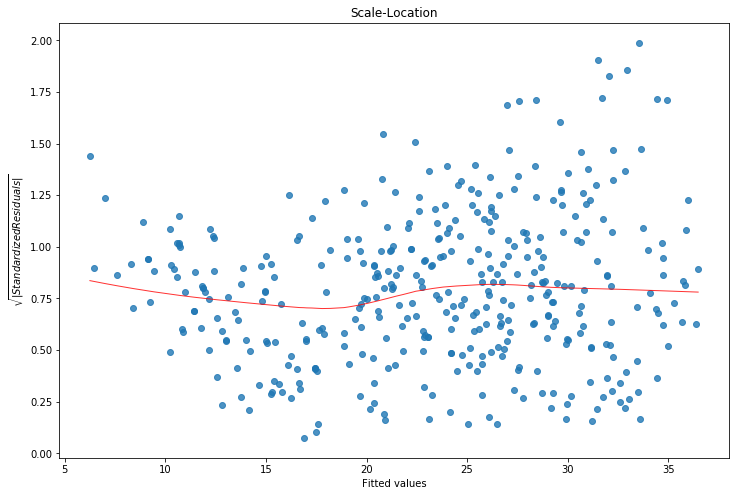

In [94]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plot_lm_3.axes[0] = sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=True, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

plt.show()

#### Leverage plot

An outlier is a point for which yi is far from the value predicted by the model.

observations with high leverage have an unusual value for xi. High leverage obs tend to have a sizable impact on the estimated regression line(compared to removing an outlier). This problem is more pronounced in multiple regression settings with more than two predictors, because there is no simple way to plot all dimensions of the data simultaneously.

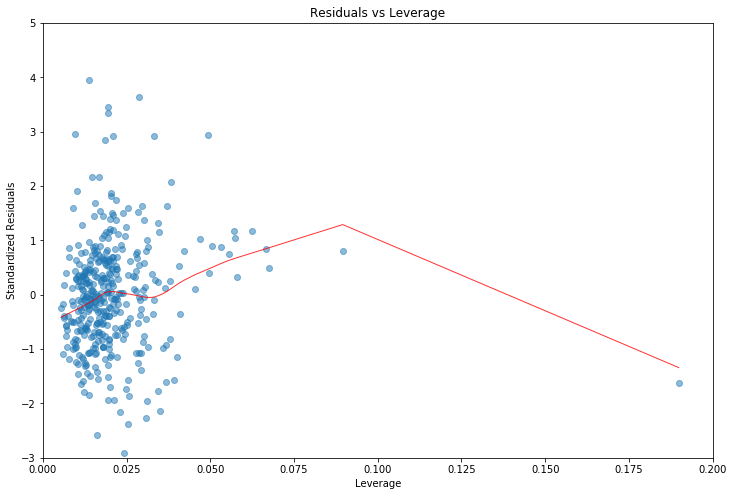

In [108]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

plt.show()

##### the linear regression model assumes that the relationship between the predictors and response are additive(effect of changes in a predictor on the response y is indedendent of the values of other predictors) and linear(assumes a linear relationship between the response and the predictors). to accomodate non-additive  and non-linear relationships we can use interaction effects and transformations. #####


extending the linear model to accommodate non-linear relationships is known as polynomial regression, since we have included polynomial functions in the regression model

 #### e. interaction effects

In [115]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.6+ KB


In [150]:
non_interactions_formula = 'mpg~'+'+'.join(auto.columns[1:-1])

In [151]:
from itertools import combinations

In [164]:
interaction_forumla = " + ".join([comb[0] + " * " + comb[1]
                                  for comb in combinations(auto.columns[1:-1], 2)])

In [165]:
interactions_forumla

'cylinders * displacement + cylinders * horsepower + cylinders * weight + cylinders * acceleration + cylinders * year + cylinders * origin + displacement * horsepower + displacement * weight + displacement * acceleration + displacement * year + displacement * origin + horsepower * weight + horsepower * acceleration + horsepower * year + horsepower * origin + weight * acceleration + weight * year + weight * origin + acceleration * year + acceleration * origin + year * origin'

In [154]:
formula = non_interactions_formula + ' + ' + interactions_forumla

In [155]:
formula

'mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin + cylinders * displacement + cylinders * horsepower + cylinders * weight + cylinders * acceleration + cylinders * year + cylinders * origin + displacement * horsepower + displacement * weight + displacement * acceleration + displacement * year + displacement * origin + horsepower * weight + horsepower * acceleration + horsepower * year + horsepower * origin + weight * acceleration + weight * year + weight * origin + acceleration * year + acceleration * origin + year * origin'

In [160]:
import statsmodels.formula.api as smf
results = smf.ols(formula,data=auto).fit()

In [162]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Wed, 21 Mar 2018   Prob (F-statistic):          4.01e-155
Time:                        12:14:27   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
cylinders:displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
cylinders:horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
cylinders:weight              0.0004      0.001      0.399      0.690      -0.001       0.002
cylinders:acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
cylinders:year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
cylinders:origin              0.4022      0.493      0.816      0.415      -0.567       1.371
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement:year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement:origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower:year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower:origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight:acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight:year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight:origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration:year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration:origin           0.4583      0.157      2.926      0.004       0.150       0.766
year:origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
===========================================================================

after adding all possible combinations(7c2=21), we see that the interaction accelation*origin is the only combination that is significant at 1%. 

 #### f. transformations

In [167]:
import statsmodels.formula.api as smf

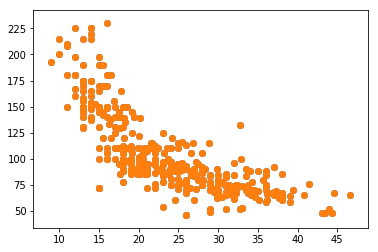

In [170]:
plt.scatter(auto.mpg,auto.horsepower)
plt.show()

In [180]:
results = smf.ols('mpg~horsepower',data=auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           7.03e-81
Time:                        12:47:09   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

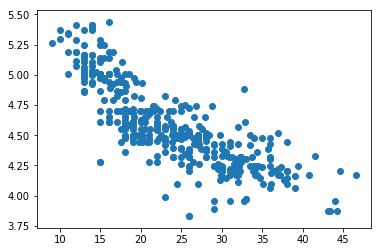

In [173]:
plt.scatter(auto.mpg,np.log(auto.horsepower))
plt.show()

In [181]:
results = smf.ols('mpg~np.log(horsepower)',data=auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     785.9
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           1.70e-95
Time:                        12:47:30   Log-Likelihood:                -1144.9
No. Observations:                 392   AIC:                             2294.
Df Residuals:                     390   BIC:                             2302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            108.6997      3.050     35.644      0.000     102.704     114.695
np.log(horsepower)   -18.5822      0.663    -28.034      0.000     -19.885     -17.279
==============================================================================
Omnibus:                       11.919   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.557
Skew:                           0.278   Prob(JB):                     0.000419
Kurtosis:                       3.803   Cond. No.                         64.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

r squared increases with log-horsepower

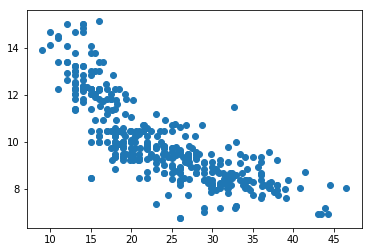

In [184]:
plt.scatter(auto.mpg,np.sqrt(auto.horsepower))
plt.show()

In [183]:
results = smf.ols('mpg~np.sqrt(horsepower)',data=auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     704.6
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           2.02e-89
Time:                        12:49:16   Log-Likelihood:                -1158.9
No. Observations:                 392   AIC:                             2322.
Df Residuals:                     390   BIC:                             2330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              58.7052      1.349     43.516      0.000      56.053      61.358
np.sqrt(horsepower)    -3.5035      0.132    -26.544      0.000      -3.763      -3.244
==============================================================================
Omnibus:                       12.446   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.121
Skew:                           0.384   Prob(JB):                      0.00142
Kurtosis:                       3.463   Cond. No.                         59.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## q10

#### a. fit a model

In [185]:
carseats = pd.read_csv('data/carseats.csv')

In [187]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [189]:
formula = 'Sales~Price+Urban+US'

In [190]:
import statsmodels.formula.api as smf

In [193]:
results = smf.ols(formula, data=carseats).fit()

In [195]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           2.39e-23
Time:                        13:50:10   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### b. interpretation of each coefficient

only US and price variables are statistically significant. for every one unit increase in price there is a reduction of -0.0545 in sales. Living in the US will adds 1.2 to sales up from 13 for outside states. P value is low signifies that there is statistical evidence that there is a real difference in prices between the two categories in US. There is no difference in sales if someone is living in urban or not.

#### c. write out the model in equation form

ignoring urban because its not signficant

in US : sales = 13.0435 + (-0.0545)*price + 1.2006  
not in US : sales =  13.0435 + (-0.0545)*price

#### d. which predictors can you reject the null hypothesis

Null hypothesis states that there is no relationship between X and Y. Mathematically, this corresponds to testing B1=0. we can reject the null hypothesis in favour of the alternate for predictors US and Price since the P value is low.

#### e. fit a smaller model using the predictors for which there is evidence of association

In [199]:
import statsmodels.formula.api as smf

In [201]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [202]:
formula = 'Sales~Price+US'

In [203]:
results = smf.ols(formula,data=carseats).fit()

In [205]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           2.66e-24
Time:                        15:55:13   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### f. how well do the models fit the data in (a) and (e) fit the data?

R-squared is very low in both the models,hence there is still a huge variance not explained by the model. 

#### g. using the model for (e), obtain 95% confidence intervals

see table

#### h. is there evidence of outliers or high leverage observations in the model from (e)

In [208]:
# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal
model_leverage = results.get_influence().hat_matrix_diag

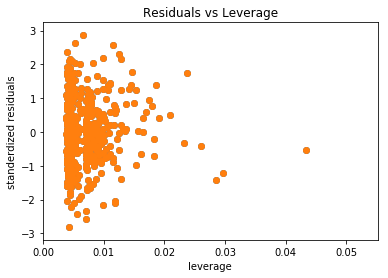

In [216]:
plt.scatter(model_leverage,model_norm_residuals)
plt.xlabel('leverage')
plt.ylabel('standerdized residuals')
plt.title('Residuals vs Leverage')
plt.xlim(xmin=0)
plt.show()

An outlier is a point for which yi is far from the value predicted by the model. all the standerdized residuals fall within the 3 std deviations hence no such outliers. we see a few leverage points above 0.025. Leverage statistic is always between 1/n and 1. if a observation has a leverage statistic that greatly exceeds (p+1)/n, then we can suspect that the corresponding point has high leverage. 

###### removing a high leverage point will have a substantial impact on the least squares line than removing the outlier.

In [217]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


## Q11

In [221]:
np.random.seed(1)
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)

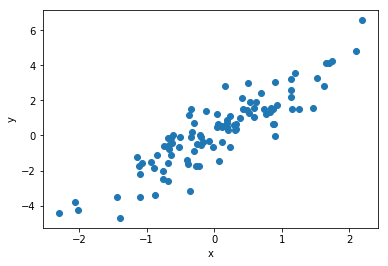

In [225]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [228]:
import statsmodels.api as sm

/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### a. simple linear regression of y onto x without an intercept

In [232]:
regressor = sm.OLS(y, x)
results = regressor.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           3.46e-36
Time:                        17:24:51   Log-Likelihood:                -135.67
No. Observations:                 100   AIC:                             273.3
Df Residuals:                      99   BIC:                             275.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

coefficient estimate:  2.1067  
standard error of the coefficient estimate: 0.1067

The standard error (SE) of a parameter is the standard deviation of its sampling distribution or an estimate of the standard deviation. If the parameter or the statistic is the mean, it is called the standard error of the mean (SEM).

t-statistic: 19.793  
p value : 0.000

#### b. simple linear regression of x onto y without an intercept

In [235]:
regressor = sm.OLS(x, y)
results = regressor.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           3.46e-36
Time:                        18:06:45   Log-Likelihood:                -49.891
No. Observations:                 100   AIC:                             101.8
Df Residuals:                      99   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### c. what is the relationship between the results obtained in (a) and (b)?